<ipython-input-7-a6f67c2332b4>:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(torch.arange(-6.0,1.0,0.0001),requires_grad = True)
  0%|          | 0/1000 [00:00<?, ?it/s]<ipython-input-7-a6f67c2332b4>:32: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  p = torch.tensor(p + learning_rate*grad, requires_grad=True)
 15%|█▍        | 149/1000 [00:00<00:00, 4258.90it/s]


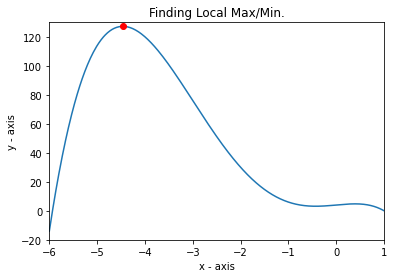

In [7]:
import torch
from matplotlib import pyplot as plt
import numpy as np
from matplotlib import animation
from tqdm  import tqdm

#creating the curve

fig, ax = plt.subplots()               
               
x = torch.tensor(torch.arange(-6.0,1.0,0.0001),requires_grad = True) 
y_temp = 3*x - 6*x**3 - x**4 + 4

for i in range(0,x.size(0)):
    y = y_temp ## defining y tensor
    


#Point
learning_rate = 0.001
iterations = 1000
p=torch.tensor([-2.],requires_grad = True) #starting with a random point like -2
p_data = []
q_data = []

#Assigning derivative and their respective coordinates in p_data and q_data
for i in tqdm(range(iterations)):
    q = 3*p - 6*p**3 - p**4 + 4        
    q.backward()
    grad = p.grad
    if(grad<0):
        p = torch.tensor(p + learning_rate*grad, requires_grad=True)
        if(torch.abs(grad) <=0.01):
            break
    else:
        p = torch.tensor(p - learning_rate*grad, requires_grad=True)
        if(torch.abs(grad) <=0.01):   #considering gradients that are very close to zero
            break
            
    
    p_data.append(p)
    q_data.append(q)

#defining axis
ax = plt.axis([-6,1,-20,130])

#initial plotting of point and line
line, = plt.plot(x.detach().numpy(), y.detach().numpy())
redDot, = plt.plot([p_data[0].detach().numpy()], [q_data[0].detach().numpy()], 'ro')
plt.xlabel('x - axis')
plt.ylabel('y - axis')
plt.title('Finding Local Max/Min.')
           
#updating point
def animate(i):
    if(i<=len(p_data)):
         redDot.set_data(p_data[i].detach().numpy(), q_data[i].detach().numpy())
    return redDot,

# create animation using the animate() function
myAnimation = animation.FuncAnimation(fig, animate, \
                                      interval=100, blit=True, repeat=True)

myAnimation.save('moving.mp4',  writer='ffmpeg')